In [82]:
# ANN framework
import numpy as np
import matplotlib.pyplot as plt
class ANN:
    def __init__(self, num_input_nodes, num_hidden_nodes, num_output_nodes, learning_rate):
        self.num_input_nodes = num_input_nodes
        self.num_hidden_nodes = num_hidden_nodes
        self.num_output_nodes = num_output_nodes
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.weights_ih = np.random.randn(num_hidden_nodes, num_input_nodes)
        self.biases_h = np.random.randn(num_hidden_nodes)
        self.weights_ho = np.random.randn(num_output_nodes, num_hidden_nodes)
        self.biases_o = np.random.randn(num_output_nodes)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagate(self, inputs):
        # Calculate hidden layer output
        self.hidden_outputs = np.dot(self.weights_ih, inputs) + self.biases_h
        self.hidden_outputs = self.sigmoid(self.hidden_outputs)

        # Calculate output layer output
        self.output_outputs = np.dot(self.weights_ho, self.hidden_outputs) + self.biases_o
        self.output_outputs = self.sigmoid(self.output_outputs)

        return self.output_outputs

    def calculate_loss(self, outputs, targets):
        # Squared error loss
        self.loss = np.sum((outputs - targets)**2) / len(targets)
        return self.loss

    def backpropagate(self, inputs, targets, outputs):
        # Calculate error at output layer
        error_o = outputs - targets

        # Calculate gradients of output layer weights and biases
        gradients_ho = error_o * outputs * (1 - outputs)
        gradients_bo = error_o

        # Calculate error at hidden layer
        error_h = np.dot(self.weights_ho.T, error_o) * self.hidden_outputs * (1 - self.hidden_outputs)

        # Calculate gradients of hidden layer weights and biases
        gradients_ih = error_h * self.hidden_outputs * (1 - self.hidden_outputs)
        gradients_bh = error_h

        # Update weights and biases
        self.weights_ho += self.learning_rate * gradients_ho
        self.biases_o += self.learning_rate * gradients_bo
        self.weights_ih += self.learning_rate * gradients_ih
        self.biases_h += self.learning_rate * gradients_bh

    def train(self, training_data, epochs):
        loss_train = np.zeros(epochs)
        accuracy_train = np.zeros(epochs)
        loss = 0
        accur = 0
        for epoch in range(epochs):
            for inputs, targets in training_data:
                outputs = self.forward_propagate(inputs)
                loss = self.calculate_loss(outputs, targets)
                accur += (outputs > 0.5) == targets
                self.backpropagate(inputs, targets, outputs)
            loss_train[epoch] = loss
            accuracy_train[epoch] = accur
        return loss_train , accuracy_train , loss, accur

    def test(self, testing_data):
        loss = 0
        accuracy = 0
        for inputs, targets in testing_data:
            outputs = self.forward_propagate(inputs)
            loss += self.calculate_loss(outputs, targets)
            accuracy += (outputs > 0.5) == targets

        loss = loss/len(testing_data)
        accuracy = accuracy/len(testing_data)

        return loss, accuracy


In [101]:
# Generate training data for XOR operation
training_data_XOR = []
for i in range(100):
    inputs = np.random.randint(2, size=2)
    targets = np.array([inputs[0] ^ inputs[1]])
    training_data_XOR.append((inputs, targets))

# Split training data into 80% training and 20% testing
training_data_XOR, testing_data_XOR = np.split(training_data_XOR, [int(0.8 * len(training_data_XOR))])

# Train the ANN
ann = ANN(num_input_nodes=2, num_hidden_nodes=2, num_output_nodes=1, learning_rate=0.1)
loss_train_XOR , accuracy_train_XOR ,loss_XOR,accur_XOR = ann.train(training_data_XOR, epochs=100)

# Test the ANN on the testing data
loss_test_XOR, accuracy_XOR = ann.test(training_data_XOR)

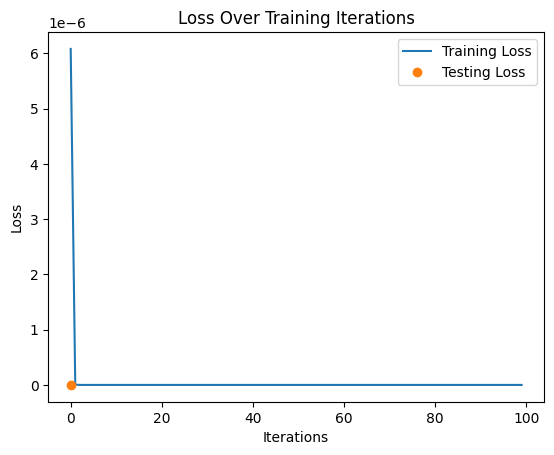

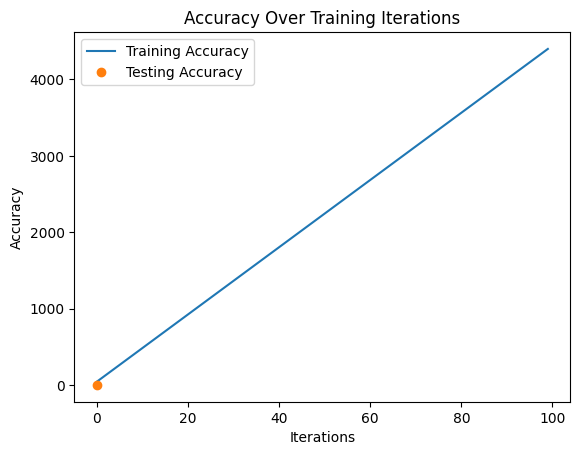

Loss at the end of Training Data 1.0
Accuracy at the end of Training Data [2400]
Loss at the end of Testing Data 0.7
Accuracy at the end of Testing Data [0.3]


In [102]:
# Plot the loss and Accuracy of Training and Testing

plt.plot(loss_train_XOR, label='Training Loss')
plt.plot(loss_XOR,'o',label='Testing Loss')
plt.title('Loss Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(accuracy_train_XOR, label='Training Accuracy')
plt.plot(accuracy_XOR,'o',label='Testing Accuracy')
plt.title('Accuracy Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print("Loss at the end of Training Data",loss)
print("Accuracy at the end of Training Data",accur)
print("Loss at the end of Testing Data",loss_test)
print("Accuracy at the end of Testing Data",accuracy)

In [92]:
# Generate training data for AND operation
training_data_AND = []
for i in range(100):
    inputs = np.random.randint(2, size=2)
    targets = np.array([inputs[0] & inputs[1]])
    training_data_AND.append((inputs, targets))

# Split training data into 80% training and 20% testing
training_data_AND, testing_data_AND = np.split(training_data_AND, [int(0.8 * len(training_data_AND))])

# Train the ANN
ann = ANN(num_input_nodes=2, num_hidden_nodes=2, num_output_nodes=1, learning_rate=0.1)
loss_train_AND , accuracy_train_AND ,loss_AND,accur_AND = ann.train(training_data_AND, epochs=100)

# Test the ANN on the testing data
loss_test_AND, accuracy_AND = ann.test(training_data_AND)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


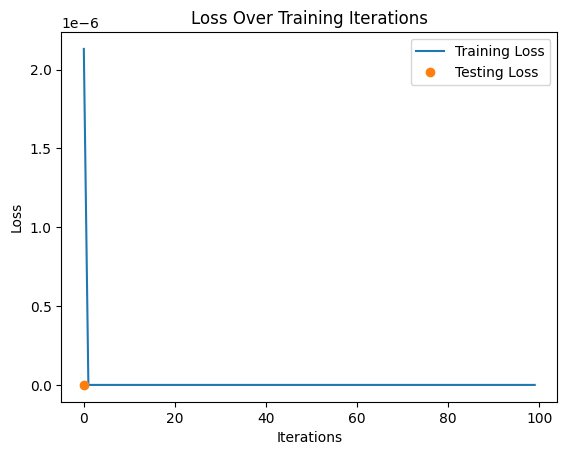

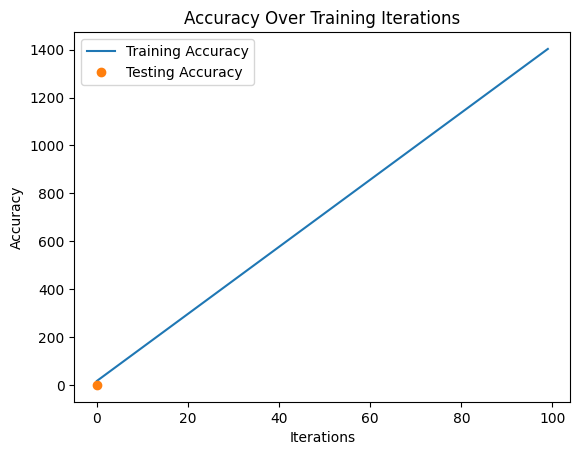

Loss at the end of Training Data 0.0
Accuracy at the end of Training Data [1403]
Loss at the end of Testing Data 0.825
Accuracy at the end of Testing Data [0.175]


In [93]:
# Plot the loss and Accuracy of Training and Testing

plt.plot(loss_train_AND, label='Training Loss')
plt.plot(loss_AND,'o',label='Testing Loss')
plt.title('Loss Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(accuracy_train_AND, label='Training Accuracy')
plt.plot(accuracy_AND,'o',label='Testing Accuracy')
plt.title('Accuracy Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print("Loss at the end of Training Data",loss_AND)
print("Accuracy at the end of Training Data",accur_AND)
print("Loss at the end of Testing Data",loss_test_AND)
print("Accuracy at the end of Testing Data",accuracy_AND)

In [97]:
# Generate training data for OR opeartion
training_data_OR = []
for i in range(10):
    inputs = np.random.randint(2, size=2)
    targets = np.array([inputs[0] | inputs[1]])
    training_data_OR.append((inputs, targets))

# Split training data into 80% training and 20% testing
training_data_OR, testing_data_OR = np.split(training_data_OR, [int(0.8 * len(training_data_OR))])

# Train the ANN
ann = ANN(num_input_nodes=2, num_hidden_nodes=2, num_output_nodes=1, learning_rate=0.1)
loss_train_OR , accuracy_train_OR ,loss_OR,accur_OR = ann.train(training_data_OR, epochs=100)

# Test the ANN on the testing data
test_loss_OR, test_accuracy_OR = ann.test(testing_data_OR)

# Print the training and test loss and accuracy
print("Training loss:", test_loss_OR)
print("Training accuracy:", test_accuracy_OR)

Training loss: 1.0635529913631295e-18
Training accuracy: [1.]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


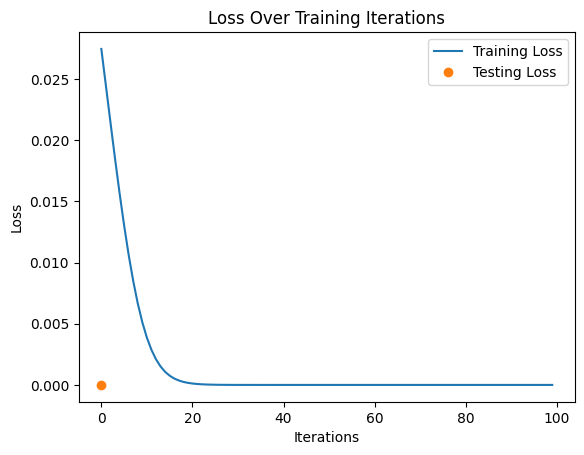

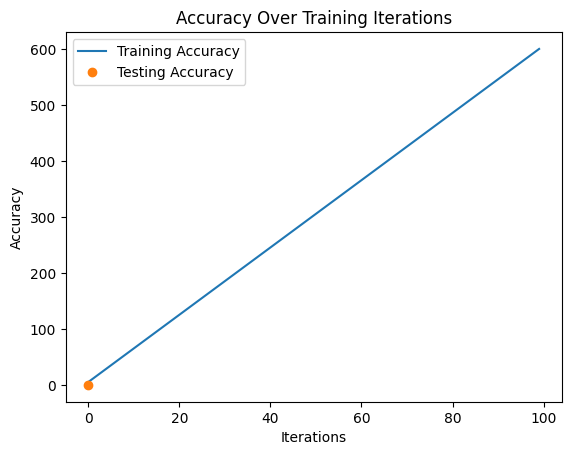

Loss at the end of Training Data 9.837112366228819e-19
Accuracy at the end of Training Data [600]
Loss at the end of Testing Data 1.0635529913631295e-18
Accuracy at the end of Testing Data [1.]


In [98]:
# Plot the loss and Accuracy of Training and Testing

plt.plot(loss_train_OR, label='Training Loss')
plt.plot(test_loss_OR,'o',label='Testing Loss')
plt.title('Loss Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(accuracy_train_OR, label='Training Accuracy')
plt.plot(test_accuracy_OR,'o',label='Testing Accuracy')
plt.title('Accuracy Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print("Loss at the end of Training Data",loss_OR)
print("Accuracy at the end of Training Data",accur_OR)
print("Loss at the end of Testing Data",test_loss_OR)
print("Accuracy at the end of Testing Data",test_accuracy_OR)

In [106]:
# Experiment with 10 training samples
training_data_10 = training_data_XOR[:10]
testing_data_10 =  testing_data_XOR
# Train the ANN
ann.train(training_data_10, epochs=100)

# Test the ANN on the testing data
test_loss_10, test_accuracy_10 = ann.test(testing_data_10)

print("Training loss (10 samples):", test_loss_10)
print("Training accuracy (10 samples):", test_accuracy_10)

# Experiment with 20 training samples
training_data_20 = training_data_XOR[:20]
testing_data_20 = testing_data_XOR
# Train the ANN
ann.train(training_data_20, epochs=100)

# Test the ANN on the testing data
test_loss_20, test_accuracy_20 = ann.test(testing_data_20)

print("Training loss (20 samples):", test_loss_20)
print("Training accuracy (20 samples):", test_accuracy_20)

# Experiment with 30 training samples
training_data_30 = training_data_XOR[:30]
testing_data_30 = testing_data_XOR
# Train the ANN
ann.train(training_data_30, epochs=100)

# Test the ANN on the testing data
test_loss_30, test_accuracy_30 = ann.test(testing_data_30)

print("Training loss (30 samples):", test_loss_30)
print("Training accuracy (30 samples):", test_accuracy_30)

<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (10 samples): 0.4
Training accuracy (10 samples): [0.6]
Training loss (20 samples): 0.4
Training accuracy (20 samples): [0.6]
Training loss (30 samples): 0.4
Training accuracy (30 samples): [0.6]


In [110]:
# Experiment with 10 training samples
training_data_10 = training_data_OR[:10]
testing_data_10 =  testing_data_OR
# Train the ANN
ann.train(training_data_10, epochs=100)

# Test the ANN on the testing data
test_loss_10, test_accuracy_10 = ann.test(testing_data_10)

print("Training loss (10 samples):", test_loss_10)
print("Training accuracy (10 samples):", test_accuracy_10)

# Experiment with 20 training samples
training_data_20 = training_data_OR[:20]
testing_data_20 = testing_data_OR
# Train the ANN
ann.train(training_data_20, epochs=100)

# Test the ANN on the testing data
test_loss_20, test_accuracy_20 = ann.test(testing_data_20)

print("Training loss (20 samples):", test_loss_20)
print("Training accuracy (20 samples):", test_accuracy_20)

# Experiment with 30 training samples
training_data_30 = training_data_OR[:30]
testing_data_30 = testing_data_OR
# Train the ANN
ann.train(training_data_30, epochs=100)

# Test the ANN on the testing data
test_loss_30, test_accuracy_30 = ann.test(testing_data_30)

print("Training loss (30 samples):", test_loss_30)
print("Training accuracy (30 samples):", test_accuracy_30)

<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (10 samples): 1.0
Training accuracy (10 samples): [0.]
Training loss (20 samples): 1.0
Training accuracy (20 samples): [0.]
Training loss (30 samples): 1.0
Training accuracy (30 samples): [0.]


In [111]:
# Experiment with 10 training samples
training_data_10 = training_data_AND[:10]
testing_data_10 =  testing_data_AND
# Train the ANN
ann.train(training_data_10, epochs=100)

# Test the ANN on the testing data
test_loss_10, test_accuracy_10 = ann.test(testing_data_10)

print("Training loss (10 samples):", test_loss_10)
print("Training accuracy (10 samples):", test_accuracy_10)

# Experiment with 20 training samples
training_data_20 = training_data_AND[:20]
testing_data_20 = testing_data_AND
# Train the ANN
ann.train(training_data_20, epochs=100)

# Test the ANN on the testing data
test_loss_20, test_accuracy_20 = ann.test(testing_data_20)

print("Training loss (20 samples):", test_loss_20)
print("Training accuracy (20 samples):", test_accuracy_20)

# Experiment with 30 training samples
training_data_30 = training_data_AND[:30]
testing_data_30 = testing_data_AND
# Train the ANN
ann.train(training_data_30, epochs=100)

# Test the ANN on the testing data
test_loss_30, test_accuracy_30 = ann.test(testing_data_30)

print("Training loss (30 samples):", test_loss_30)
print("Training accuracy (30 samples):", test_accuracy_30)

<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (10 samples): 0.3
Training accuracy (10 samples): [0.7]
Training loss (20 samples): 0.3
Training accuracy (20 samples): [0.7]
Training loss (30 samples): 0.3
Training accuracy (30 samples): [0.7]


In [109]:
# Set batch size to 5
batch_size = 5

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_XOR), batch_size):
        batch_training_data = training_data_XOR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_XOR)

print("Training loss (batch size=5):", test_loss)
print("Training accuracy (batch size=5):", test_accuracy)

# Set batch size to 10
batch_size = 10

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_XOR), batch_size):
        batch_training_data = training_data_XOR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_XOR)

print("Training loss (batch size=10):", test_loss)
print("Training accuracy (batch size=10):", test_accuracy)

# Set batch size to 20
batch_size = 20

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_XOR), batch_size):
        batch_training_data = training_data_XOR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_XOR)

print("Training loss (batch size=20):", test_loss)


<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (batch size=5): 0.4
Training accuracy (batch size=5): [0.6]
Training loss (batch size=10): 0.4
Training accuracy (batch size=10): [0.6]
Training loss (batch size=20): 0.4


In [112]:
# Set batch size to 5
batch_size = 5

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_OR), batch_size):
        batch_training_data = training_data_OR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_OR)

print("Training loss (batch size=5):", test_loss)
print("Training accuracy (batch size=5):", test_accuracy)

# Set batch size to 10
batch_size = 10

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_OR), batch_size):
        batch_training_data = training_data_OR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_OR)

print("Training loss (batch size=10):", test_loss)
print("Training accuracy (batch size=10):", test_accuracy)

# Set batch size to 20
batch_size = 20

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_OR), batch_size):
        batch_training_data = training_data_OR[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_OR)

print("Training loss (batch size=20):", test_loss)


<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (batch size=5): 1.0
Training accuracy (batch size=5): [0.]
Training loss (batch size=10): 1.0
Training accuracy (batch size=10): [0.]
Training loss (batch size=20): 1.0


In [113]:
# Set batch size to 5
batch_size = 5

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_AND), batch_size):
        batch_training_data = training_data_AND[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_AND)

print("Training loss (batch size=5):", test_loss)
print("Training accuracy (batch size=5):", test_accuracy)

# Set batch size to 10
batch_size = 10

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_AND), batch_size):
        batch_training_data = training_data_AND[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_AND)

print("Training loss (batch size=10):", test_loss)
print("Training accuracy (batch size=10):", test_accuracy)

# Set batch size to 20
batch_size = 20

# Train the ANN
for epoch in range(100):
    for i in range(0, len(training_data_AND), batch_size):
        batch_training_data = training_data_AND[i:i + batch_size]
        ann.train(batch_training_data, 1)

# Test the ANN on the testing data
test_loss, test_accuracy = ann.test(testing_data_AND)

print("Training loss (batch size=20):", test_loss)


<ipython-input-82-34a30e72a1fb>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training loss (batch size=5): 0.3
Training accuracy (batch size=5): [0.7]
Training loss (batch size=10): 0.3
Training accuracy (batch size=10): [0.7]
Training loss (batch size=20): 0.3
